In [1]:
from mnist import MNIST
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from network import *
from activations import *
from utils import *
%matplotlib inline

In [30]:
from sklearn.svm import SVC

In [2]:
mdata =MNIST('mnist')
images, labels = mdata.load_training()
imgs = np.array(images)
lbls = np.array(labels)

In [2]:
X_tr, y_tr, X_val, y_val = data('mnist')

3

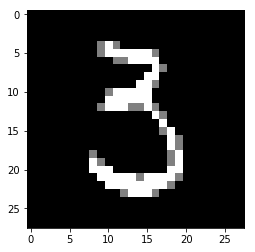

In [29]:
ind = 7
im = np.array(X_val[ind], dtype=np.uint8)
im = im.reshape((28, 28))
plt.imshow(im, cmap='gray')
y_val[ind]

In [5]:
layers = [784, 100, 10]
model = ClassificationNetwork(layers, activation=[Relu, Softmax])
sc = Scaler()
X_tr = sc.fit_transform(X_tr)

In [28]:
model.predict(X_val[:10])

array([3, 8, 6, 9, 6, 4, 5, 3, 8, 4])

In [19]:
model.forward(X_tr[:3])

array([[  1.25479891e-04,   9.99956343e-01,   3.91286255e-05],
       [  2.79496149e-05,   7.32977861e-06,   3.86543925e-04],
       [  5.36718929e-05,   1.53664747e-05,   5.04991135e-03],
       [  5.14555703e-01,   1.20575445e-05,   1.78439504e-04],
       [  2.04776398e-09,   3.45204155e-10,   9.69717903e-01],
       [  4.84737699e-01,   2.51908527e-07,   1.60518463e-05],
       [  1.58569588e-06,   3.80243520e-06,   1.89376682e-04],
       [  4.87998925e-04,   1.26553168e-06,   2.28436206e-02],
       [  1.23279281e-06,   1.22067424e-06,   1.41887724e-04],
       [  8.67805541e-06,   2.36270188e-06,   1.43713721e-03]])

In [7]:
model.optimize(X_tr, y_tr, lr=0.5, batch_size=64, nb_epoch=4)

Accuracy after 1 epochs  95.352 %
Accuracy after 2 epochs  96.6 %
Accuracy after 3 epochs  97.518 %
Accuracy after 4 epochs  96.928 %


In [8]:
X_val = sc.transform(X_val)

In [9]:
model.forward(X_val[:4])

array([[  7.57772580e-07,   1.54563524e-06],
       [  2.09899591e-04,   1.02141500e-05],
       [  5.73193972e-04,   8.32140681e-05],
       [  9.99137355e-01,   2.48049969e-03],
       [  7.14716839e-07,   3.46551246e-04],
       [  4.95299400e-06,   3.90673943e-05],
       [  1.53491570e-05,   2.17825902e-05],
       [  2.19273068e-08,   6.84316133e-06],
       [  5.72478181e-05,   9.96915448e-01],
       [  5.07124023e-07,   9.48339144e-05]])

In [10]:
model.accuracy(X_val, y_val)

96.040000000000006

In [10]:
X = imgs[:20]
y = lbls[:20]

In [34]:
(-one_hot(y, 10) * np.log(model.forward(X).T)).sum()

13.662251370909555

In [30]:
model.forward(X).T

array([[ 0.36286173,  0.33366329,  0.6103997 ,  0.6460355 ,  0.69645492,
         0.67244247,  0.33845079,  0.86724409,  0.68967872,  0.39828161],
       [ 0.4793561 ,  0.48468209,  0.58451853,  0.54528867,  0.64826664,
         0.4853824 ,  0.3605966 ,  0.7298627 ,  0.62152784,  0.24689799],
       [ 0.595519  ,  0.53354923,  0.68782245,  0.75669328,  0.53297612,
         0.37896294,  0.19609238,  0.91524909,  0.58667164,  0.60094077],
       [ 0.30980584,  0.44330247,  0.68582073,  0.5481385 ,  0.53937494,
         0.50673931,  0.19014145,  0.88150689,  0.60190569,  0.2901234 ],
       [ 0.30355035,  0.47184224,  0.62830575,  0.667946  ,  0.27006879,
         0.54645116,  0.12501149,  0.85206979,  0.65683203,  0.496301  ],
       [ 0.33662586,  0.40422025,  0.64399051,  0.6668058 ,  0.66568059,
         0.54667316,  0.17917433,  0.83171938,  0.57956538,  0.39290362],
       [ 0.31928269,  0.5155936 ,  0.66755876,  0.63809026,  0.55809768,
         0.55851248,  0.193049  ,  0.88274752

In [25]:
z = np.exp(model.forward(X))
(z / np.sum(z, axis=0))[:, 0]

array([ 0.08069263,  0.0783706 ,  0.10335661,  0.10710622,  0.1126449 ,
        0.10997224,  0.07874669,  0.13362396,  0.11188418,  0.08360197])

In [39]:
def f(a):
    print (type(a) == list)

In [40]:
f([])

True
